In [120]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [121]:
df  = pd.read_csv('Titanic-Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


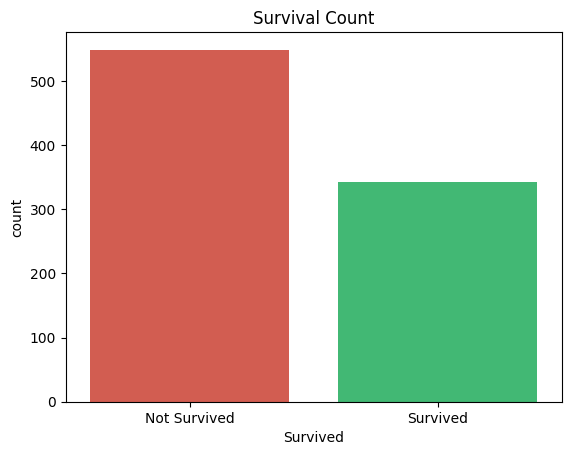

In [122]:
sns.countplot(x='Survived',data=df,hue='Survived',palette=['#e74c3c', '#2ecc71'],legend=False)
plt.xticks([0,1],['Not Survived', 'Survived'])
plt.title('Survival Count')
plt.show()

Text(0, 0.5, 'Frequency')

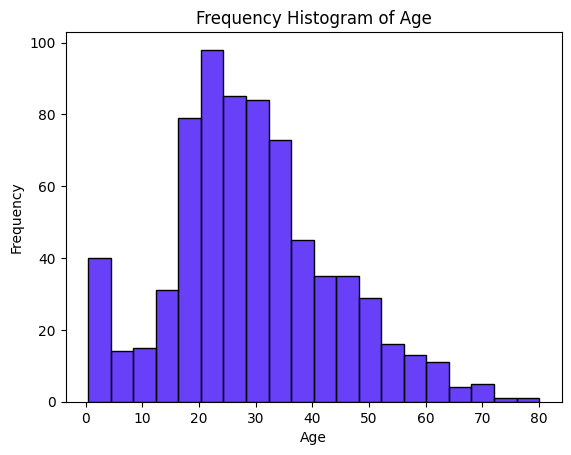

In [123]:
sns.histplot(data=df,x='Age', bins=20,color="#3500f5")
plt.title('Frequency Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

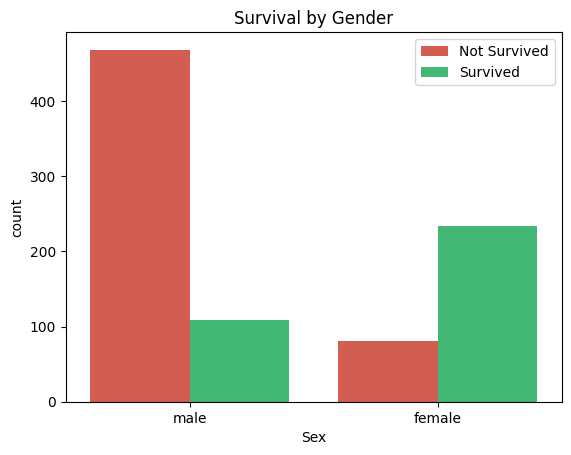

In [124]:
sns.countplot(x='Sex', hue='Survived', data=df, palette=['#e74c3c', '#2ecc71'])
plt.title('Survival by Gender')
plt.legend(['Not Survived', 'Survived'])
plt.show()

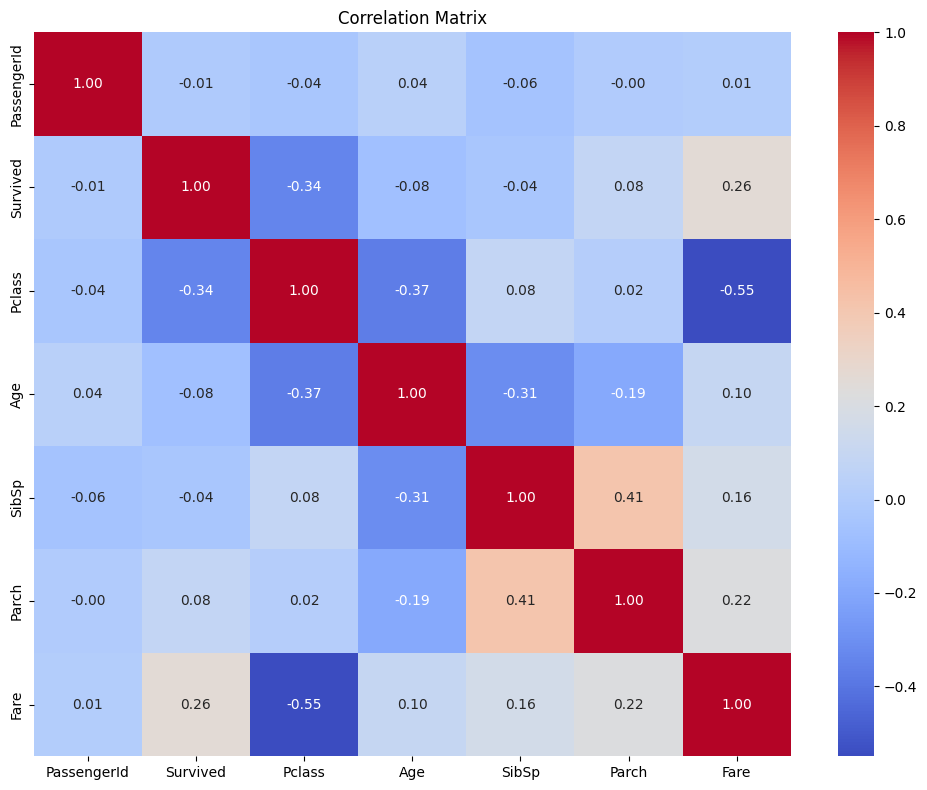

In [125]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

Survival Rate by Gender:
Sex
female    74.203822
male      18.890815


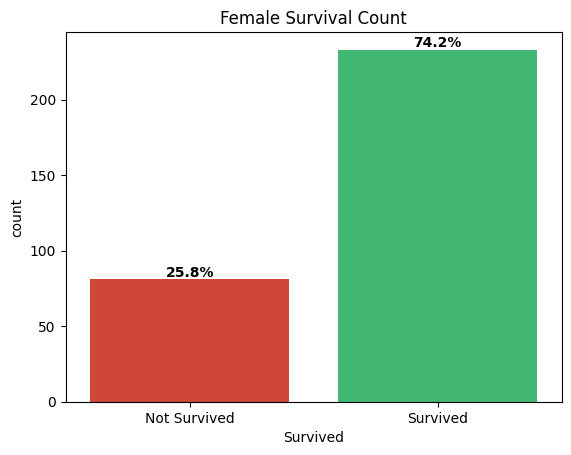

In [126]:
survival_by_gender = df.groupby('Sex')['Survived'].mean() * 100
print("Survival Rate by Gender:")
print(survival_by_gender.to_string())

female_df = df[df['Sex'] == 'female']
ax = sns.countplot(x='Survived', data=female_df, hue='Survived', palette=["#e7331f", '#2ecc71'], legend=False)
plt.xticks([0, 1], ['Not Survived', 'Survived'])
plt.title('Female Survival Count')
total = len(female_df)
for p in ax.patches:
    pct = f'{100 * p.get_height() / total:.1f}%'
    ax.text(p.get_x() + p.get_width()/2, p.get_height() + 2, pct, ha='center', fontweight='bold')
plt.show()

Survival Rate by Passenger Class:
Pclass
1    62.962963
2    47.282609
3    24.236253


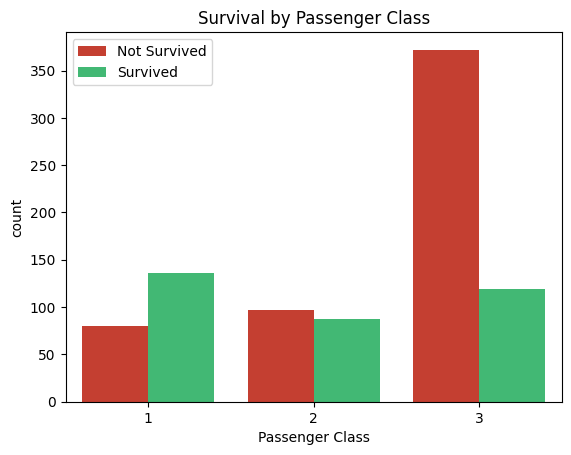

In [127]:
survival_by_class = df.groupby('Pclass')['Survived'].mean() * 100
print("Survival Rate by Passenger Class:")
print(survival_by_class.to_string())

sns.countplot(x='Pclass', hue='Survived', data=df, palette=["#dd2b18", '#2ecc71'])
plt.title('Survival by Passenger Class')
plt.xlabel('Passenger Class')
plt.legend(['Not Survived', 'Survived'])
plt.show()

In [128]:
avg_age_all = df['Age'].mean()
avg_age_survived = df[df['Survived'] == 1]['Age'].mean()
avg_age_not_survived = df[df['Survived'] == 0]['Age'].mean()

print(f"Average Age of All Passengers: {avg_age_all:.2f}")
print(f"Average Age of Survivors: {avg_age_survived:.2f}")
print(f"Average Age of Non-Survivors: {avg_age_not_survived:.2f}")

Average Age of All Passengers: 29.70
Average Age of Survivors: 28.34
Average Age of Non-Survivors: 30.63


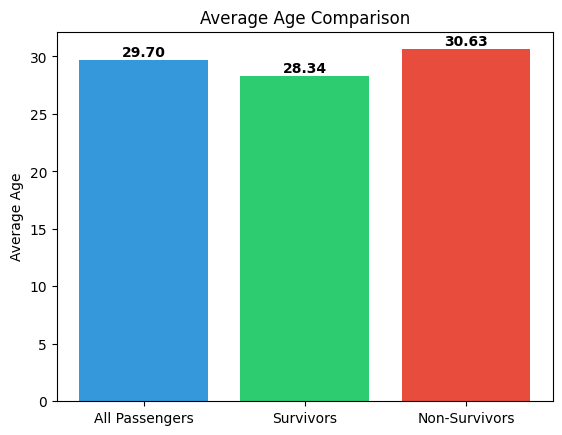

In [129]:
categories = ['All Passengers', 'Survivors', 'Non-Survivors']
ages = [avg_age_all, avg_age_survived, avg_age_not_survived]

plt.bar(categories, ages, color=['#3498db', '#2ecc71', '#e74c3c'])
for i, v in enumerate(ages):
    plt.text(i, v + 0.3, f'{v:.2f}', ha='center', fontweight='bold')
plt.title('Average Age Comparison')
plt.ylabel('Average Age')
plt.show()

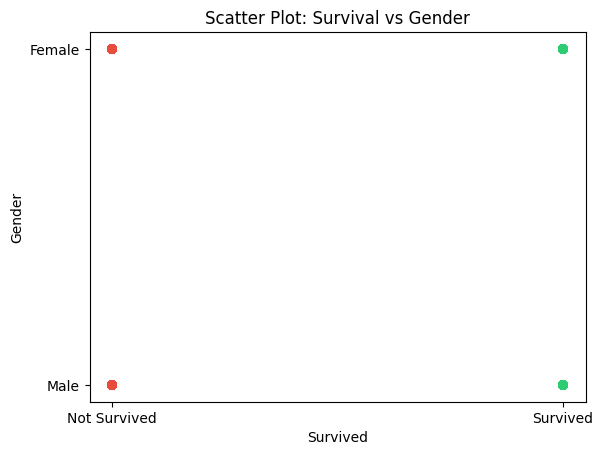

In [130]:
df['Sex_num'] = df['Sex'].map({'male': 0, 'female': 1})

plt.scatter(df['Survived'], df['Sex_num'], c=df['Survived'].map({0: '#e74c3c', 1: '#2ecc71'}), alpha=0.5)
plt.xticks([0, 1], ['Not Survived', 'Survived'])
plt.yticks([0, 1], ['Male', 'Female'])
plt.title('Scatter Plot: Survival vs Gender')
plt.xlabel('Survived')
plt.ylabel('Gender')
plt.show()

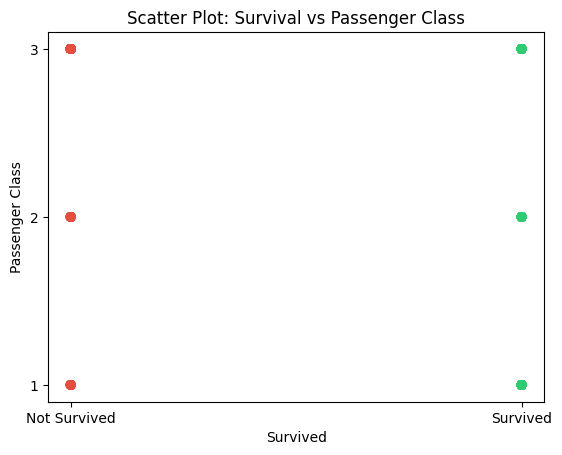

In [131]:
plt.scatter(df['Survived'], df['Pclass'], c=df['Survived'].map({0: '#e74c3c', 1: '#2ecc71'}), alpha=0.5)
plt.xticks([0, 1], ['Not Survived', 'Survived'])
plt.yticks([1, 2, 3])
plt.title('Scatter Plot: Survival vs Passenger Class')
plt.xlabel('Survived')
plt.ylabel('Passenger Class')
plt.show()

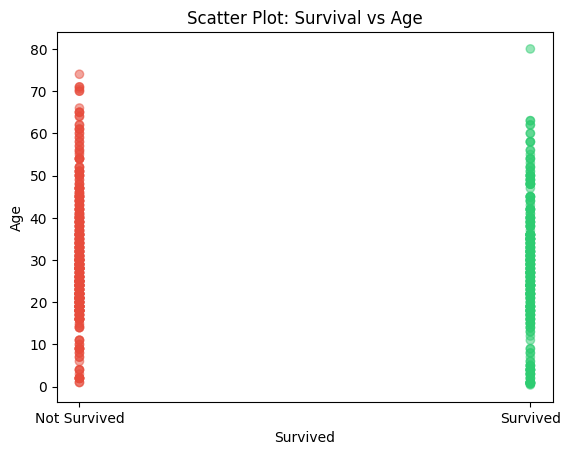

In [132]:
plt.scatter(df['Survived'], df['Age'], c=df['Survived'].map({0: '#e74c3c', 1: '#2ecc71'}), alpha=0.5)
plt.xticks([0, 1], ['Not Survived', 'Survived'])
plt.title('Scatter Plot: Survival vs Age')
plt.xlabel('Survived')
plt.ylabel('Age')
plt.show()

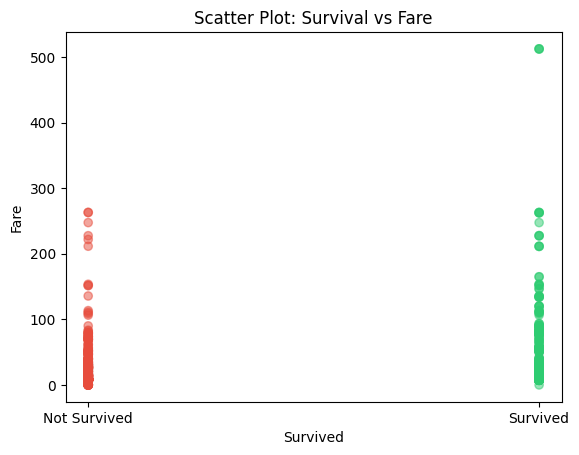

In [133]:
plt.scatter(df['Survived'], df['Fare'], c=df['Survived'].map({0: '#e74c3c', 1: '#2ecc71'}), alpha=0.5)
plt.xticks([0, 1], ['Not Survived', 'Survived'])
plt.title('Scatter Plot: Survival vs Fare')
plt.xlabel('Survived')
plt.ylabel('Fare')
plt.show()